In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models

In [3]:
plt.style.use('bmh')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.labelsize'] = 15
plt.rc('legend',fontsize=15) # using a size in points
import pygtc


In [4]:
plabels = ["$M_{*}$", "$\\alpha$", "$\\sigma$"," $\\gamma$", "$\\beta$", "$\\tau$"]

priors = [[9.5,11.5], [-1,7], [0,5], [-2,2], [-3,2], [-2,2]]

fixed = [False, True, True, False, True, False]

### first the alpha permutations

In [5]:
beta1 = jsm_mcmc.Chain("../../../data/beta_permutations/mock_1/chain.h5", fixed=fixed, Nstack=500, Nburn=500, Nthin=15)

beta2 = jsm_mcmc.Chain("../../../data/beta_permutations/mock_2/chain.h5", fixed=fixed, Nstack=500, Nburn=500, Nthin=15)


# sigma2 = jsm_mcmc.Chain("../../../data/Feature_Recovery/sigma_permutations/mock_2/chain.h5", fixed=fixed, Nstack=500, Nburn=500, Nthin=15)

# sigma3 = jsm_mcmc.Chain("../../../data/Feature_Recovery/sigma_permutations/mock_3/chain.h5", fixed=fixed, Nstack=500, Nburn=500, Nthin=15)

# sigma4 = jsm_mcmc.Chain("../../../data/Feature_Recovery/sigma_permutations/mock_4/chain.h5", fixed=fixed, Nstack=500, Nburn=500, Nthin=15)

In [123]:
fixed = [False, True, True, True, False, False]

test = jsm_mcmc.Chain("../../../data/preliminary/first_draft/mock_permutations_a2/model_B/gamma/mock_1/chain.h5", fixed=fixed, Nstack=500, Nburn=500, Nthin=15)

In [124]:
test.clean

array([[1.9795373 , 0.23021374, 0.80209806],
       [1.9667074 , 0.4031931 , 1.25962512],
       [2.00116423, 0.17476895, 1.6915258 ],
       ...,
       [1.98715561, 0.03189955, 0.50679814],
       [2.0189051 , 1.20289625, 0.4350942 ],
       [1.99283244, 1.59405439, 2.24844875]])

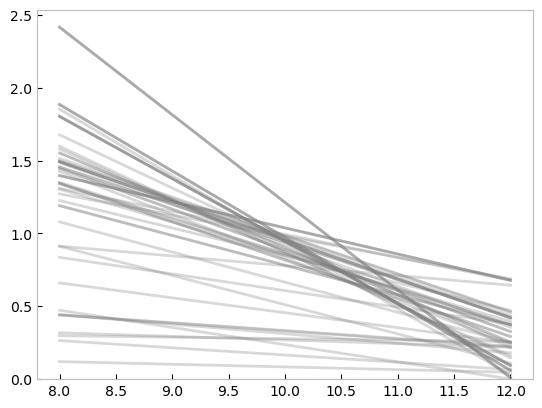

In [125]:
halo_masses = np.linspace(8,12,100)

for i in test.clean[0:1000]:
    if i[2] <= 0:
        #and ((-i[1] / i[2]) + 12) < 9:
        sigma = i[1] + i[2]*(halo_masses - 12)
        plt.plot(halo_masses, sigma, color="grey", alpha=0.3)
plt.ylim(0)
plt.show()

In [ ]:
def lnprior(theta):
    lp = 0.0
    for i, param in enumerate(theta):
        if not fixed[i] and not (priors[i][0] < param < priors[i][1]): # the flat priors
            return -np.inf
        if i == 0:
            lp += -(((param - 10.5) / 0.1) ** 2) / 2.0 # the gaussian prior on the anchor point
        elif i == 3 and param > 0 and not ((-theta[2] / param) + 12) < 9: # the positive mass dependance of sigma
            return -np.inf
        elif i == 4 and param > 0 and not ((-theta[1] / (2 * param)) + 12) < 9: # the curvature issue
            return -np.inf
    return lp

In [129]:
test.samples.shape

(3000, 100, 6)

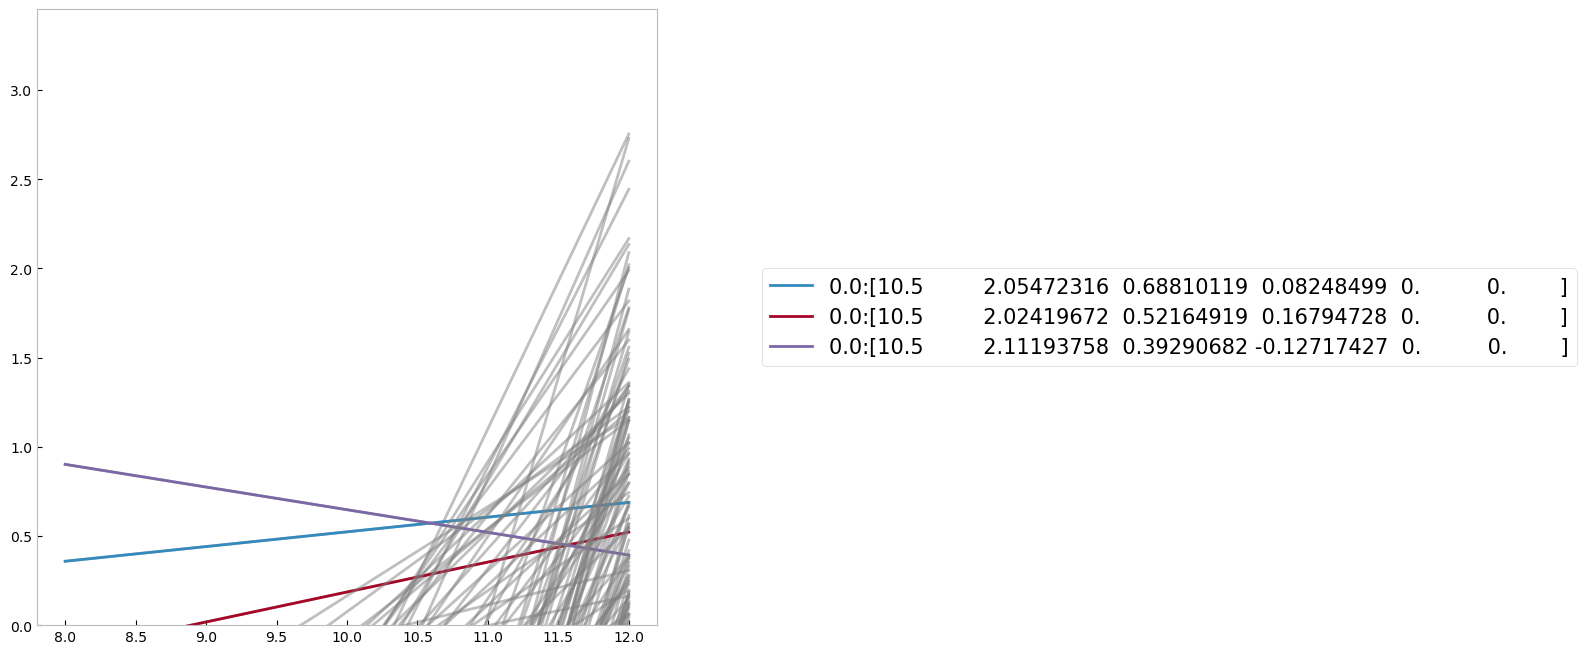

In [139]:
plt.figure(figsize=(8,8))
for i in test.samples[2900, :, :]:
    sigma = i[2] + i[3]*(halo_masses - 12)
    plt.plot(halo_masses, sigma, color="grey", alpha=0.5)
    if lnprior(i) == 0.0:
        plt.plot(halo_masses, sigma, label=str(lnprior(i))+":"+str(i))
plt.legend(loc='center right', bbox_to_anchor=(2.5, 0.5))

plt.ylim(0)
plt.show()

In [8]:
print("$\\alpha = $" + beta1.constraints[0] + "\n $\\sigma = $" + beta1.constraints[1] + "\n $\\beta = $" + beta1.constraints[2])

$\alpha = $$2.83_{-0.240}^{+1.067}$
 $\sigma = $$0.49_{-0.331}^{+0.668}$
 $\beta = $$0.34_{-0.096}^{+0.292}$


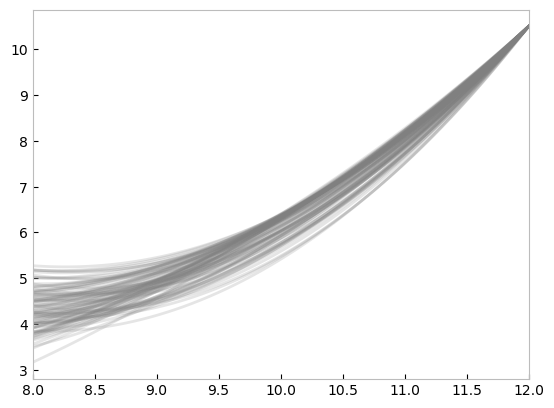

In [8]:
halo_masses = np.linspace(8,12,100)

for i in beta1.clean[6600:6700]:
    derivative = (-i[0]/(2*i[2])) + 12
    if derivative < 8.5:
        lgMs = jsm_SHMR.general([10.5, i[0], 0, 0, i[2], 0], halo_masses, 0, Nsamples=1)
        plt.plot(halo_masses, lgMs, color="grey", alpha=0.2)
    # derivative = (-i[0]/(2*i[2])) + 12
    # plt.axvline(derivative, color="red", ls=":")

plt.xlim(8,12)
plt.show()

In [73]:
priors = [[9.5,11.5], [-1,7], [0,5], [-2,2], [-3,2], [-2,2]]

fixed = [False, True, True, False, True, False]

In [122]:
def lnprior(theta):
    lp = 0.0
    for i, param in enumerate(theta):
        if not fixed[i] and not (priors[i][0] < param < priors[i][1]): # the flat priors
            return -np.inf
        if i == 0:
            lp += -(((param - 10.5) / 0.1) ** 2) / 2.0 # the gaussian prior on the anchor point
        elif i == 3 and param > 0 and not ((-theta[2] / param) + 12) < 9: # the positive mass dependance of sigma
            return -np.inf
        elif i == 4 and param > 0 and not ((-theta[1] / (2 * param)) + 12) < 9: # the curvature issue
            return -np.inf
    return lp

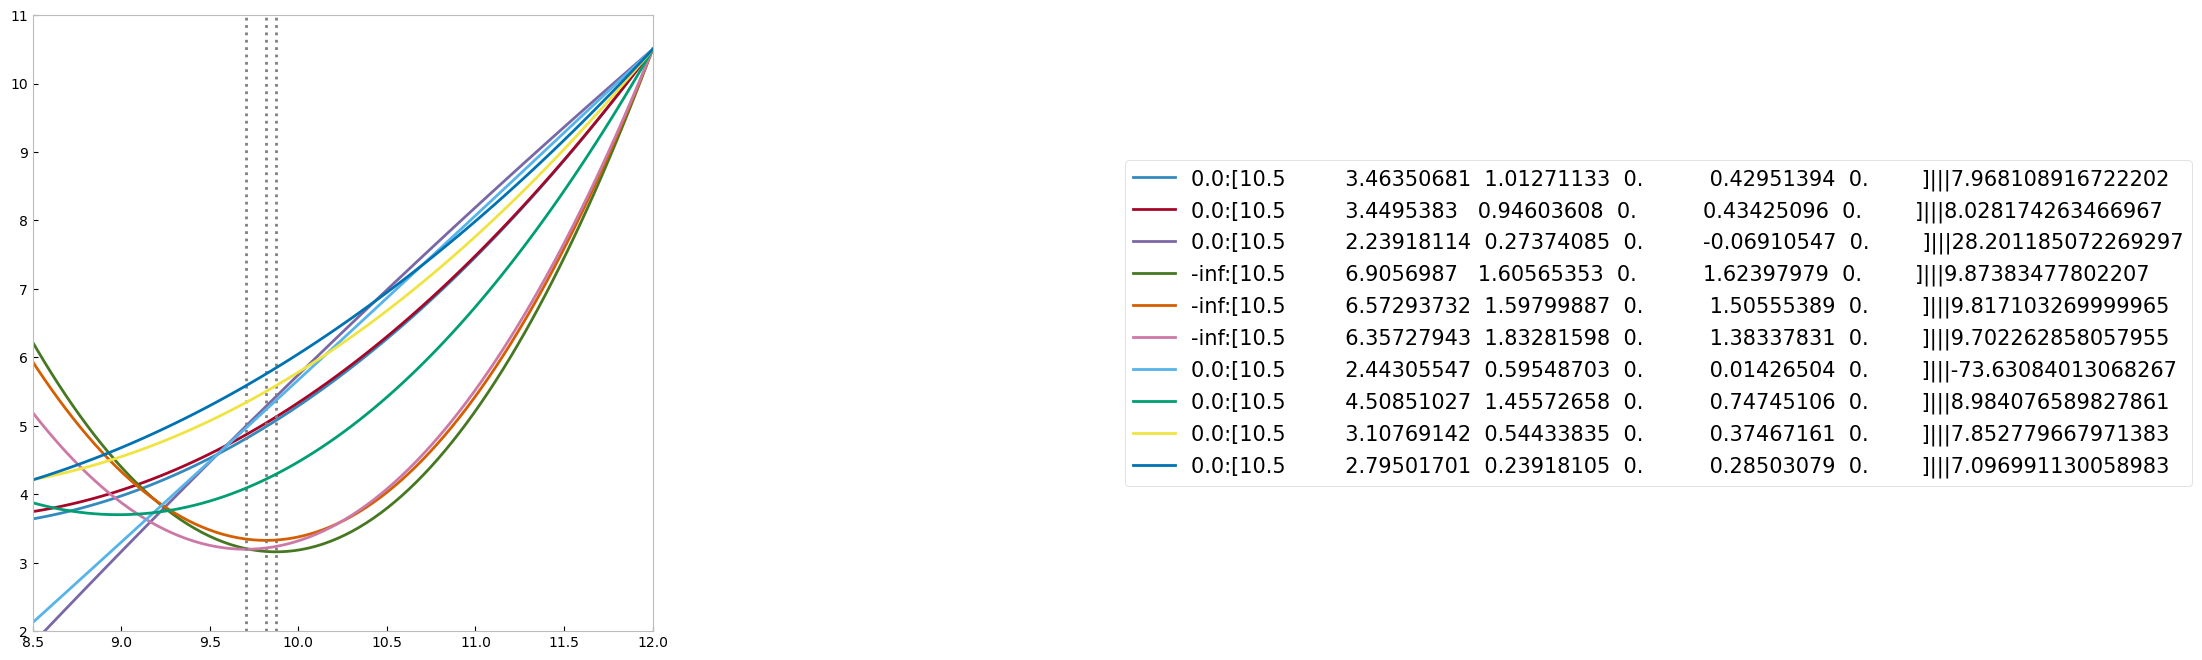

In [86]:
plt.figure(figsize=(8,8))
for i in beta2.samples[1480, 15:25, :]:
    derivative = (-i[1]/(2*i[4])) + 12
    lgMs = jsm_SHMR.general([10.5, i[1], 0, 0, i[4], 0], halo_masses, 0, Nsamples=1)
    plt.plot(halo_masses, lgMs, label=str(lnprior(i))+":"+str(i)+"|||"+str(derivative))
    if derivative > 9:
        plt.axvline(derivative, color="grey", ls=":")
plt.legend(loc='center right', bbox_to_anchor=(3.5, 0.5))
plt.ylim(2,11)
plt.xlim(8.5,12)
plt.show()